# Image Augmentation with Imgaug library

In [1]:
from imgaug import augmenters as iaa



In [3]:
seq = iaa.Sequential([
    iaa.Crop(px=(0, 16)), # crop images from each side by 0 to 16px (randomly chosen)
    iaa.Fliplr(0.5), # horizontally flip 50% of the images
    iaa.GaussianBlur(sigma=(0, 3.0)) # blur images with a sigma of 0 to 3.0
])

In [4]:
seq.

Sequential(name=UnnamedSequential, random_order=False, children=[CropAndPad(name=UnnamedCrop, parameters=[DiscreteUniform(Deterministic(int 0), Deterministic(int -16)), None, None, None, None, Deterministic(constant), Deterministic(int 0)], deterministic=False), Fliplr(name=UnnamedFliplr, parameters=[Binomial(Deterministic(float 0.50000000))], deterministic=False), GaussianBlur(name=UnnamedGaussianBlur, parameters=[Uniform(Deterministic(int 0), Deterministic(float 3.00000000))], deterministic=False)], deterministic=False)

In [8]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array

In [5]:
datagen = ImageDataGenerator(preprocessing_function=seq.augment_image)

## Load image

In [9]:
import numpy as np

In [10]:
img = load_img('/Users/abalaji/myData/DataScience/TinyImageNet/tiny-imagenet-200/train/n01443537/images/n01443537_165.JPEG')



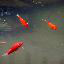

In [12]:
img

In [13]:
img = img_to_array(img)

In [15]:
img.shape

(64, 64, 3)

In [16]:
# need in 4 dimensions.
img = np.expand_dims(img, axis=0)

In [17]:
img.shape

(1, 64, 64, 3)

## Augment the image

In [18]:
?datagen.flow

In [20]:
generator = datagen.flow(img)

In [23]:
## collect 10 images.
images = [next(generator)[0].astype(np.uint8) for i in range(0,10) ]

In [25]:
len(images)

10

In [41]:
#images[0]

In [27]:
from keras.preprocessing.image import array_to_img

In [32]:
import matplotlib.pyplot as plt

%matplotlib inline

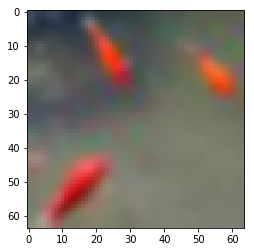

In [34]:
for i in range(0,10):
    plt.imshow(array_to_img(images[i]))
plt.show()

In [35]:
?plt.imshow

In [36]:
?plt.subplot

In [38]:
def plot_figures(figures, nrows = 1, ncols=1):
    """Plot a dictionary of figures.

    Parameters
    ----------
    figures : <title, figure> dictionary
    ncols : number of columns of subplots wanted in the display
    nrows : number of rows of subplots wanted in the figure
    """

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows)
    for ind,title in zip(range(len(figures)), figures):
        axeslist.ravel()[ind].imshow(figures[title], cmap=plt.jet())
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional

In [37]:
image_dict = { 'im'+str(i): images[i] for i in range(0,10)}

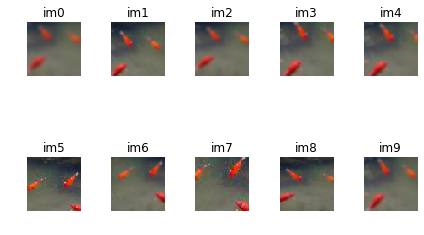

In [40]:
plot_figures(image_dict,2,5)

## Define new set of Augmentations

In [ ]:
img_aug = iaa.Sequential([
    iaa.GaussianBlur(sigma=(0.0, 3.0)),    # blur the images
    iaa.Fliplr(0.5),                       # horizontally flip 50% of the images
    iaa.Crop(px=(0, 16)),                  # crop images from each side by 0 to 16px (randomly chosen)
    iaa.ContrastNormalization((0.5, 1.5)), # normalize the contrast
    iaa.CropAndPad(percent=(-0.25, 0.25)), # crop and pad with black 
    iaa.Affine(scale=(0.5, 1.5)),          # zoom in and zoom out 50 to 150%
    iaa.Affine(translate_px={"x": (-20, 20), "y": (-20, 20)}), # translate x & y 20 pixels independently
    iaa.Affine(rotate=(-18, 18)),          # rotate
    iaa.Affine(shear=(-15, 15)),           # shear
    iaa.Sharpen(alpha=(0.0, 1.0), lightness=(0.75, 2.0)) # sharpen the image
])